In [1]:
# Supervised learning: KNN Algorithm on MNIST Digits Dataset
    
# References:
    
# https://www.kaggle.com/gaurav9297/digit-recognition-using-simple-knn
# https://gurus.pyimagesearch.com/lesson-sample-k-nearest-neighbor-classification/
    

In [2]:
# import modules
import pandas as pd
import numpy as np

# machine learning modules:

# K nearest neighbours algorithm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

# visualiation modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

# seed the generator to keep results consistent between runs
state_rand = np.random.seed(1001)


In [3]:
# read in data
df = pd.read_csv('./Input/train.csv')
df_test = pd.read_csv('./Input/test.csv')
# print the first 5 samples
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("train shape: " + str(df.shape))
print("df_test shape: " + str(df_test.shape))

train shape: (42000, 785)
df_test shape: (28000, 784)


In [5]:
image_df = df.iloc[0:,1:]
labels_df = df.iloc[0:,:1]

print("image_df shape: " + str(image_df.shape))
print("labels_df shape: " + str(labels_df.shape))

image_df shape: (42000, 784)
labels_df shape: (42000, 1)


In [6]:
# Split data into train, validation, and test sets

X, X_test, y, y_test = train_test_split(image_df, labels_df,random_state = state_rand, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X, y,random_state = state_rand, test_size = len(X_test)/len(X))
print(X.shape)
print("X_test shape: " + str(X_test.shape))
print('-----------')
print("X_train shape: " + str(X_train.shape))
print("X_val shape: " + str(X_val.shape))


(37800, 784)
X_test shape: (4200, 784)
-----------
X_train shape: (33600, 784)
X_val shape: (4200, 784)


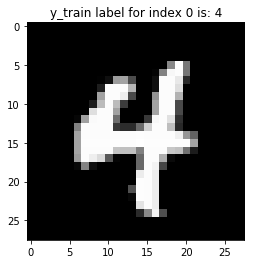

In [7]:
#examine 1 number
# divide into 28x28 pixels
i=0
img = X_train.iloc[i].values
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title("y_train label for index " +str(i) + " is: " + str(y_train['label'].iloc[i]));

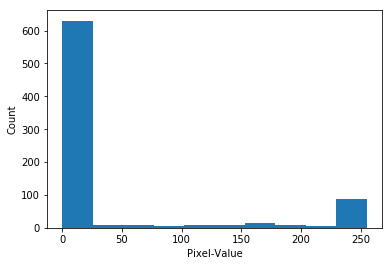

In [8]:
plt.xlabel("Pixel-Value")
plt.ylabel("Count")
plt.hist(X_train.iloc[i]);


In [9]:
# create a function that will plot KNN accuracy over a range of k values
def KNN_model_multi_k(X_train,X_val,y_train,y_val):
    
    a_index=list(range(1,11))
    a=pd.Series()

    for i in list(range(1,11)):
        print("running k = " + str(i))
        model = KNeighborsClassifier(n_neighbors = i,metric='euclidean')
        model.fit(X_train,y_train.values.ravel())
        prediction = model.predict(X_val)
        a = a.append(pd.Series(metrics.accuracy_score(prediction,y_val)))
    plt.plot(a_index, a)
#     plt.title("KNN Classification")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.xticks(a_index);



running k = 1
running k = 2
running k = 3
running k = 4
running k = 5
running k = 6
running k = 7
running k = 8
running k = 9
running k = 10


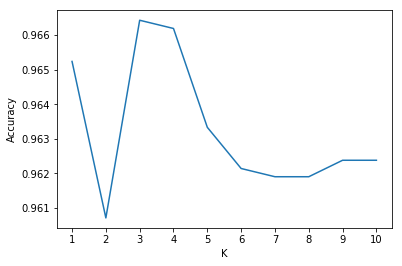

In [10]:
# run model on validation dataset and find an optimal k for use on the testing dataset

KNN_model_multi_k(X_train, X_val, y_train, y_val)

In [11]:
# create a function for the KNN model
def KNN_model(X_train, X_val, y_train, y_val, n_num):
    knn_model = KNeighborsClassifier(n_neighbors = n_num, metric='euclidean')
    knn_model.fit(X_train, y_train.values.ravel())

    prediction = knn_model.predict(X_val)

    print('The accuracy of the KNN is:', metrics.accuracy_score(prediction, y_val))
    return prediction, knn_model

In [12]:
# train the model using a k of 3
prediction, knn_model = KNN_model(X_train, X_val, y_train, y_val, 3) 

The accuracy of the KNN is: 0.9664285714285714


In [13]:
# generate predictions for the X_test dataframe based on the KNN model created using a k = 3
predicted_y = knn_model.predict(X_test)

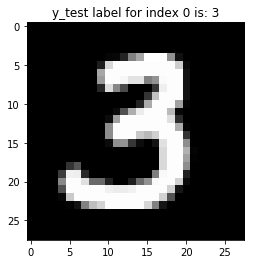

In [14]:
# check the 0th index to see if the prediction was correct
i=0
img = X_test.iloc[i].values
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title("y_test label for index " +str(i) + " is: " + str(y_test['label'].iloc[i]));

In [15]:
#generate a confusion matrix to summarize the performance of the classifier

#             predicted digit
#                no, yes
# actual    no    tn, fp
# digit     yes   fn, tp

conf_data = confusion_matrix(y_test, predicted_y)
df4 = pd.DataFrame(data=conf_data)

df4

,0,1,2,3,4,5,6,7,8,9
0,425,0,0,0,1,1,0,0,1,0
1,1,435,1,1,0,0,0,1,0,0
2,2,6,422,0,0,0,0,2,0,0
3,1,1,1,405,0,6,0,1,1,1
4,1,6,0,0,422,0,1,0,0,10
5,1,0,1,7,1,377,6,1,1,2
6,3,0,1,1,1,1,395,0,0,0
7,0,4,1,0,1,0,0,429,0,6
8,2,10,3,13,4,9,0,3,344,8
9,0,1,1,6,4,0,0,4,0,392


In [16]:
# statistical measures for the classification of each digit using the k = 3 KNN model
print("Classification report for {0}\n{1}\n".format(knn_model, metrics.classification_report(y_test, predicted_y)))


Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       428
           1       0.94      0.99      0.96       439
           2       0.98      0.98      0.98       432
           3       0.94      0.97      0.95       417
           4       0.97      0.96      0.97       440
           5       0.96      0.95      0.95       397
           6       0.98      0.98      0.98       402
           7       0.97      0.97      0.97       441
           8       0.99      0.87      0.93       396
           9       0.94      0.96      0.95       408

   micro avg       0.96      0.96      0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200


